## From the `EDA and ML Modeling.ipynb` file, the Random Forest Classification Model performed the best

## This file will try and enhance that model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('Dataset For ML Modeling.csv')
df.head()

,GAME_DATE_EST,GAME_ID,SEASON,TEAM_ID_HOME,TEAM_CITY_HOME,TEAM_NICKNAME_HOME,GAME_NUMBER_TEAM_HOME,TEAM_ID_AWAY,TEAM_CITY_AWAY,TEAM_NICKNAME_AWAY,...,PTS_DIFFERENCE,FG_PCT_DIFFERENCE,FT_PCT_DIFFERENCE,FG3_PCT_DIFFERENCE,AST_DIFFERENCE,REB_DIFFERENCE,STREAK_DIFFERENCE,W_PCT_DIFFERENCE,HOME_ROAD_W_PCT_DIFFERENCE,HOME_TEAM_WINS
0,2003-10-30,20300016,2003,1610612753,Orlando,Magic,2,1610612740,New Orleans,Pelicans,...,-3.0,0.044,-0.148,0.090,-7.0,-11.0,0.0,0.0,0.0,0
1,2003-10-30,20300018,2003,1610612756,Phoenix,Suns,2,1610612739,Cleveland,Cavaliers,...,-10.0,-0.104,0.143,-0.045,-10.0,4.0,0.0,0.0,0.0,1
2,2003-10-31,20300024,2003,1610612741,Chicago,Bulls,2,1610612737,Atlanta,Hawks,...,-9.0,-0.081,-0.124,0.017,-2.0,-11.0,0.0,0.0,0.0,1
3,2003-10-31,20300025,2003,1610612746,Los Angeles,Clippers,2,1610612760,Seattle,Thunder,...,-9.0,0.010,0.179,0.090,-1.0,6.0,-2.0,-1.0,0.0,0
4,2003-10-31,20300019,2003,1610612761,Toronto,Raptors,2,1610612764,Washington,Wizards,...,-9.0,-0.062,0.133,-0.250,-8.0,-3.0,0.0,0.0,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24073 entries, 0 to 24072
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GAME_DATE_EST               24073 non-null  object 
 1   GAME_ID                     24073 non-null  int64  
 2   SEASON                      24073 non-null  int64  
 3   TEAM_ID_HOME                24073 non-null  int64  
 4   TEAM_CITY_HOME              24073 non-null  object 
 5   TEAM_NICKNAME_HOME          24073 non-null  object 
 6   GAME_NUMBER_TEAM_HOME       24073 non-null  int64  
 7   TEAM_ID_AWAY                24073 non-null  int64  
 8   TEAM_CITY_AWAY              24073 non-null  object 
 9   TEAM_NICKNAME_AWAY          24073 non-null  object 
 10  GAME_NUMBER_TEAM_AWAY       24073 non-null  int64  
 11  EFF_DIFFERENCE              24073 non-null  float64
 12  PTS_DIFFERENCE              24073 non-null  float64
 13  FG_PCT_DIFFERENCE           240

In [4]:
feature_columns = ['EFF_DIFFERENCE', 'PTS_DIFFERENCE', 'FG_PCT_DIFFERENCE', 'FT_PCT_DIFFERENCE', 'FG3_PCT_DIFFERENCE', 
                   'AST_DIFFERENCE', 'REB_DIFFERENCE', 'STREAK_DIFFERENCE', 'W_PCT_DIFFERENCE', 'HOME_ROAD_W_PCT_DIFFERENCE']
target_column = 'HOME_TEAM_WINS'
X = df[feature_columns]
y = df[target_column]

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
print('Length of X_train:', len(X_train))
print('Length of X_test:', len(X_test))
print('Length of y_train:', len(y_train))
print('Length of y_test:', len(y_test))

Length of X_train: 18054
Length of X_test: 6019
Length of y_train: 18054
Length of y_test: 6019


In [6]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)
rfc_y_predictions = rfc.predict(X_test)
print('Random Forest Classification Report:')
print(classification_report(y_true=y_test, y_pred=rfc_y_predictions))
print()
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_true=y_test, y_pred=rfc_y_predictions))
print()
print('Random Forest Accuracy Score:')
print(accuracy_score(y_true=y_test, y_pred=rfc_y_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.46      0.52      2481
           1       0.68      0.79      0.73      3538

    accuracy                           0.66      6019
   macro avg       0.64      0.63      0.63      6019
weighted avg       0.65      0.66      0.65      6019


Random Forest Confusion Matrix:
[[1141 1340]
 [ 728 2810]]

Random Forest Accuracy Score:
0.6564213324472504


#### From above, there are 1340 False Positives and 728 False Negatives
#### Thus, the precision value is 0.68, the recall value is 0.79, the f1-score value is 0.73, and the overall accuracy value is 0.656 when the threshold for the model is set to 0.5

In [7]:
rfc_feature_importances_df = pd.DataFrame(rfc.feature_importances_, index = X_train.columns, columns = ['Importance']).sort_values('Importance', ascending = False).reset_index()
rfc_feature_importances_df.columns = ['Feature', 'Importance']
rfc_feature_importances_df

,Feature,Importance
0,W_PCT_DIFFERENCE,0.437092
1,HOME_ROAD_W_PCT_DIFFERENCE,0.352991
2,EFF_DIFFERENCE,0.089832
3,STREAK_DIFFERENCE,0.044917
4,PTS_DIFFERENCE,0.028015
5,FG_PCT_DIFFERENCE,0.023284
6,FT_PCT_DIFFERENCE,0.007323
7,FG3_PCT_DIFFERENCE,0.005913
8,AST_DIFFERENCE,0.005717
9,REB_DIFFERENCE,0.004917


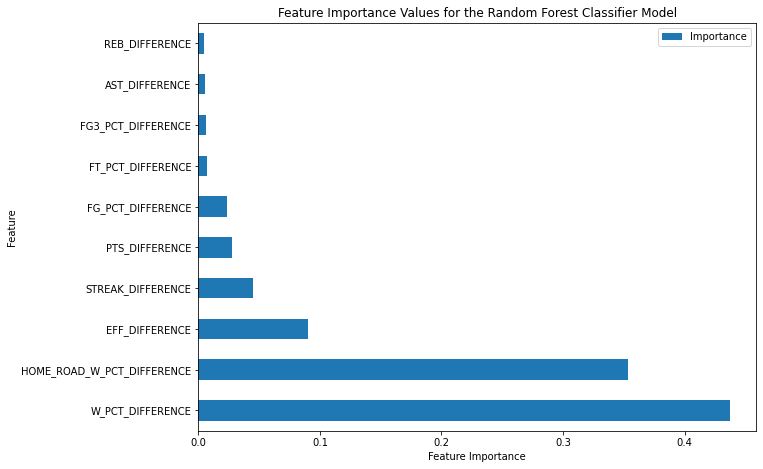

In [8]:
rfc_feature_importances_df.plot.barh(x='Feature', y='Importance')
plt.title('Feature Importance Values for the Random Forest Classifier Model')
plt.xlabel('Feature Importance')
fig = plt.gcf()
fig.set_size_inches(10,7.5)
plt.show()

## Predict_Proba Values

In [9]:
rfc_y_predict_proba = rfc.predict_proba(X_test)
print(rfc_y_predict_proba)

[[0.55894139 0.44105861]
 [0.20840846 0.79159154]
 [0.33681707 0.66318293]
 ...
 [0.58143448 0.41856552]
 [0.34123643 0.65876357]
 [0.29417561 0.70582439]]


In [10]:
print(y_test)

4436     0
9973     1
11229    1
18152    0
10282    0
        ..
21021    1
7930     0
15272    0
4661     0
2782     1
Name: HOME_TEAM_WINS, Length: 6019, dtype: int64


In [11]:
false_positives_index_lst = []
for i in range(len(rfc_y_predictions)):
    if (rfc_y_predictions[i] != y_test.values[i]) and y_test.values[i] == 0:
        false_positives_index_lst.append(i)

predict_proba_values_false_positives_lst = []
for i in false_positives_index_lst:
    predict_proba_values_false_positives_lst.append(rfc_y_predict_proba[i][1])

print('Number of False Positives:', len(predict_proba_values_false_positives_lst))

false_negatives_index_lst = []
for i in range(len(rfc_y_predictions)):
    if (rfc_y_predictions[i] != y_test.values[i]) and y_test.values[i] == 1:
        false_negatives_index_lst.append(i)

predict_proba_values_false_negatives_lst = []
for i in false_negatives_index_lst:
    predict_proba_values_false_negatives_lst.append(rfc_y_predict_proba[i][1])

print('Number of False Negatives:', len(predict_proba_values_false_negatives_lst))

Number of False Positives: 1340
Number of False Negatives: 728


### Summary Statistics for False Positives List

In [12]:
min_predict_proba_false_positive = np.min(predict_proba_values_false_positives_lst)
q1_predict_proba_false_positive = np.quantile(predict_proba_values_false_positives_lst, 0.25)
median_predict_proba_false_positive = np.median(predict_proba_values_false_positives_lst)
q3_predict_proba_false_positive = np.quantile(predict_proba_values_false_positives_lst, 0.75)
max_predict_proba_false_positive = np.max(predict_proba_values_false_positives_lst)
mean_predict_proba_false_positive = np.mean(predict_proba_values_false_positives_lst)
print('Minimum Predict Proba Value for False Positives:', min_predict_proba_false_positive)
print('Q1 Predict Proba Value for False Positives:', q1_predict_proba_false_positive)
print('Median Predict Proba Value for False Positives:', median_predict_proba_false_positive)
print('Q3 Predict Proba Value for False Positives:', q3_predict_proba_false_positive)
print('Maximum Predict Proba Value for False Positives:', max_predict_proba_false_positive)
print('Mean Predict Proba Value for False Positives:', mean_predict_proba_false_positive)

Minimum Predict Proba Value for False Positives: 0.5000069465875986
Q1 Predict Proba Value for False Positives: 0.5620088133979302
Median Predict Proba Value for False Positives: 0.6366519306634152
Q3 Predict Proba Value for False Positives: 0.7079779265134788
Maximum Predict Proba Value for False Positives: 0.8264487470040155
Mean Predict Proba Value for False Positives: 0.6389007788737133


### Summary Statistics for False Negatives List

In [13]:
min_predict_proba_false_negative = np.min(predict_proba_values_false_negatives_lst)
q1_predict_proba_false_negative = np.quantile(predict_proba_values_false_negatives_lst, 0.25)
median_predict_proba_false_negative = np.median(predict_proba_values_false_negatives_lst)
q3_predict_proba_false_negative = np.quantile(predict_proba_values_false_negatives_lst, 0.75)
max_predict_proba_false_negative = np.max(predict_proba_values_false_negatives_lst)
mean_predict_proba_false_negative = np.mean(predict_proba_values_false_negatives_lst)
print('Minimum Predict Proba Value for False Negatives:', min_predict_proba_false_negative)
print('Q1 Predict Proba Value for False Negatives:', q1_predict_proba_false_negative)
print('Median Predict Proba Value for False Negatives:', median_predict_proba_false_negative)
print('Q3 Predict Proba Value for False Negatives:', q3_predict_proba_false_negative)
print('Maximum Predict Proba Value for False Negatives:', max_predict_proba_false_negative)
print('Mean Predict Proba Value for False Negatives:', mean_predict_proba_false_negative)

Minimum Predict Proba Value for False Negatives: 0.28346741904158185
Q1 Predict Proba Value for False Negatives: 0.38868278300753534
Median Predict Proba Value for False Negatives: 0.4327711549420571
Q3 Predict Proba Value for False Negatives: 0.4627142390966648
Maximum Predict Proba Value for False Negatives: 0.49922260456158574
Mean Predict Proba Value for False Negatives: 0.42328127502306406


## Adjusting the threshold value for the Random Forest Classification Model

#### Setting the threshold to be the mean predict_proba value of the false positives list

In [14]:
adjusted_rfc_y_predictions_lst = []
for i in rfc_y_predict_proba[:,1]:
    if i > round(mean_predict_proba_false_positive,3):
        adjusted_rfc_y_predictions_lst.append(1)
    else:
        adjusted_rfc_y_predictions_lst.append(0)

print('Accuracy Score with threshold being ' + str(round(mean_predict_proba_false_positive,3)) + ':', 
      accuracy_score(y_true=y_test, y_pred=adjusted_rfc_y_predictions_lst))

Accuracy Score with threshold being 0.639: 0.6231932214653597


#### Setting the threshold to be the median predict_proba value of the false positives list

In [15]:
adjusted_rfc_y_predictions_lst = []
for i in rfc_y_predict_proba[:,1]:
    if i > round(median_predict_proba_false_positive,3):
        adjusted_rfc_y_predictions_lst.append(1)
    else:
        adjusted_rfc_y_predictions_lst.append(0)

print('Accuracy Score with threshold being ' + str(round(median_predict_proba_false_positive,3)) + ':', 
      accuracy_score(y_true=y_test, y_pred=adjusted_rfc_y_predictions_lst))

Accuracy Score with threshold being 0.637: 0.6240239242399069


#### Setting the threshold to be the Q1 predict_proba value of the false positives list

In [16]:
adjusted_rfc_y_predictions_lst = []
for i in rfc_y_predict_proba[:,1]:
    if i > round(q1_predict_proba_false_positive,3):
        adjusted_rfc_y_predictions_lst.append(1)
    else:
        adjusted_rfc_y_predictions_lst.append(0)

print('Accuracy Score with threshold being ' + str(round(q1_predict_proba_false_positive,3)) + ':', 
      accuracy_score(y_true=y_test, y_pred=adjusted_rfc_y_predictions_lst))

Accuracy Score with threshold being 0.562: 0.6552583485628842


In [17]:
adjusted_rfc_y_predictions_lst = []
for i in rfc_y_predict_proba[:,1]:
    if i > 0.52:
        adjusted_rfc_y_predictions_lst.append(1)
    else:
        adjusted_rfc_y_predictions_lst.append(0)

print('Accuracy Score with threshold being ' + str(0.52) + ':', 
      accuracy_score(y_true=y_test, y_pred=adjusted_rfc_y_predictions_lst))

Accuracy Score with threshold being 0.52: 0.6569197541119788


In [18]:
adjusted_rfc_y_predictions_lst = []
for i in rfc_y_predict_proba[:,1]:
    if i > 0.51:
        adjusted_rfc_y_predictions_lst.append(1)
    else:
        adjusted_rfc_y_predictions_lst.append(0)

print('Accuracy Score with threshold being ' + str(0.51) + ':', 
      accuracy_score(y_true=y_test, y_pred=adjusted_rfc_y_predictions_lst))

Accuracy Score with threshold being 0.51: 0.6580827379963449


In [19]:
adjusted_rfc_y_predictions_lst = []
for i in rfc_y_predict_proba[:,1]:
    if i > 0.505:
        adjusted_rfc_y_predictions_lst.append(1)
    else:
        adjusted_rfc_y_predictions_lst.append(0)

print('Accuracy Score with threshold being ' + str(0.505) + ':', 
      accuracy_score(y_true=y_test, y_pred=adjusted_rfc_y_predictions_lst))

Accuracy Score with threshold being 0.505: 0.6584150191061638


In [20]:
adjusted_rfc_y_predictions_lst = []
for i in rfc_y_predict_proba[:,1]:
    if i > 0.50499:
        adjusted_rfc_y_predictions_lst.append(1)
    else:
        adjusted_rfc_y_predictions_lst.append(0)

print('Accuracy Score with threshold being ' + str(0.50499) + ':', 
      accuracy_score(y_true=y_test, y_pred=adjusted_rfc_y_predictions_lst))

Accuracy Score with threshold being 0.50499: 0.6584150191061638


## Applying Feature Selection to the model

### From above, the features with the top 3 highest feature importance values are `W_PCT_DIFFERENCE`, `HOME_ROAD_W_PCT_DIFFERENCE`, and `EFF_DIFFERENCE`

#### Will apply feature selection using only these 3 features

In [21]:
feature_selected_columns = ['W_PCT_DIFFERENCE', 'HOME_ROAD_W_PCT_DIFFERENCE', 'EFF_DIFFERENCE']
target_column = 'HOME_TEAM_WINS'
X_feature_selected = df[feature_selected_columns]
y = df[target_column]
X_train_feature_selected, X_test_feature_selected, y_train, y_test = train_test_split(X_feature_selected,y,test_size=0.25, 
                                                                                      random_state=0)
rfc_feature_selected = RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=100, random_state=0)
rfc_feature_selected.fit(X_train_feature_selected, y_train)
rfc_feature_selected_y_predictions = rfc_feature_selected.predict(X_test_feature_selected)
print('Random Forest with Feature Selection Classification Report:')
print(classification_report(y_true=y_test, y_pred=rfc_feature_selected_y_predictions))
print()
print('Random Forest with Feature Selection Confusion Matrix:')
print(confusion_matrix(y_true=y_test, y_pred=rfc_feature_selected_y_predictions))
print()
print('Random Forest with Feature Selection Accuracy Score:')
print(accuracy_score(y_true=y_test, y_pred=rfc_feature_selected_y_predictions))

Random Forest with Feature Selection Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.46      0.53      2481
           1       0.68      0.80      0.73      3538

    accuracy                           0.66      6019
   macro avg       0.65      0.63      0.63      6019
weighted avg       0.65      0.66      0.65      6019


Random Forest with Feature Selection Confusion Matrix:
[[1144 1337]
 [ 708 2830]]

Random Forest with Feature Selection Accuracy Score:
0.6602425652101678


### From above, the features with the top 4 highest feature importance values are `W_PCT_DIFFERENCE`, `HOME_ROAD_W_PCT_DIFFERENCE`, `EFF_DIFFERENCE`, and `STREAK_DIFFERENCE`

#### Will apply feature selection using only these 4 features

In [22]:
feature_selected_columns = ['W_PCT_DIFFERENCE', 'HOME_ROAD_W_PCT_DIFFERENCE', 'EFF_DIFFERENCE', 'STREAK_DIFFERENCE']
target_column = 'HOME_TEAM_WINS'
X_feature_selected = df[feature_selected_columns]
y = df[target_column]
X_train_feature_selected, X_test_feature_selected, y_train, y_test = train_test_split(X_feature_selected,y,test_size=0.25, 
                                                                                      random_state=0)
rfc_feature_selected = RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=100, random_state=0)
rfc_feature_selected.fit(X_train_feature_selected, y_train)
rfc_feature_selected_y_predictions = rfc_feature_selected.predict(X_test_feature_selected)
print('Random Forest with Feature Selection Classification Report:')
print(classification_report(y_true=y_test, y_pred=rfc_feature_selected_y_predictions))
print()
print('Random Forest with Feature Selection Confusion Matrix:')
print(confusion_matrix(y_true=y_test, y_pred=rfc_feature_selected_y_predictions))
print()
print('Random Forest with Feature Selection Accuracy Score:')
print(accuracy_score(y_true=y_test, y_pred=rfc_feature_selected_y_predictions))

Random Forest with Feature Selection Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.48      0.54      2481
           1       0.68      0.79      0.73      3538

    accuracy                           0.66      6019
   macro avg       0.65      0.63      0.64      6019
weighted avg       0.65      0.66      0.65      6019


Random Forest with Feature Selection Confusion Matrix:
[[1197 1284]
 [ 759 2779]]

Random Forest with Feature Selection Accuracy Score:
0.6605748463199868


### From above, the features with the top 5 highest feature importance values are `W_PCT_DIFFERENCE`, `HOME_ROAD_W_PCT_DIFFERENCE`, `EFF_DIFFERENCE`, `STREAK_DIFFERENCE`, and `PTS_DIFFERENCE`

#### Will apply feature selection using only these 5 features

In [23]:
feature_selected_columns = ['W_PCT_DIFFERENCE', 'HOME_ROAD_W_PCT_DIFFERENCE', 'EFF_DIFFERENCE', 'STREAK_DIFFERENCE', 
                            'PTS_DIFFERENCE']
target_column = 'HOME_TEAM_WINS'
X_feature_selected = df[feature_selected_columns]
y = df[target_column]
X_train_feature_selected, X_test_feature_selected, y_train, y_test = train_test_split(X_feature_selected,y,test_size=0.25, 
                                                                                      random_state=0)
rfc_feature_selected = RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=100, random_state=0)
rfc_feature_selected.fit(X_train_feature_selected, y_train)
rfc_feature_selected_y_predictions = rfc_feature_selected.predict(X_test_feature_selected)
print('Random Forest with Feature Selection Classification Report:')
print(classification_report(y_true=y_test, y_pred=rfc_feature_selected_y_predictions))
print()
print('Random Forest with Feature Selection Confusion Matrix:')
print(confusion_matrix(y_true=y_test, y_pred=rfc_feature_selected_y_predictions))
print()
print('Random Forest with Feature Selection Accuracy Score:')
print(accuracy_score(y_true=y_test, y_pred=rfc_feature_selected_y_predictions))

Random Forest with Feature Selection Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.48      0.54      2481
           1       0.68      0.79      0.73      3538

    accuracy                           0.66      6019
   macro avg       0.65      0.63      0.63      6019
weighted avg       0.65      0.66      0.65      6019


Random Forest with Feature Selection Confusion Matrix:
[[1185 1296]
 [ 753 2785]]

Random Forest with Feature Selection Accuracy Score:
0.65957800299053


### From above, the features with the top 6 highest feature importance values are `W_PCT_DIFFERENCE`, `HOME_ROAD_W_PCT_DIFFERENCE`, `EFF_DIFFERENCE`, `STREAK_DIFFERENCE`, `PTS_DIFFERENCE`, and `FG_PCT_DIFFERENCE`

#### Will apply feature selection using only these 6 features

In [24]:
feature_selected_columns = ['W_PCT_DIFFERENCE', 'HOME_ROAD_W_PCT_DIFFERENCE', 'EFF_DIFFERENCE', 'STREAK_DIFFERENCE', 
                            'PTS_DIFFERENCE', 'FG_PCT_DIFFERENCE']
target_column = 'HOME_TEAM_WINS'
X_feature_selected = df[feature_selected_columns]
y = df[target_column]
X_train_feature_selected, X_test_feature_selected, y_train, y_test = train_test_split(X_feature_selected,y,test_size=0.25, 
                                                                                      random_state=0)
rfc_feature_selected = RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=100, random_state=0)
rfc_feature_selected.fit(X_train_feature_selected, y_train)
rfc_feature_selected_y_predictions = rfc_feature_selected.predict(X_test_feature_selected)
print('Random Forest with Feature Selection Classification Report:')
print(classification_report(y_true=y_test, y_pred=rfc_feature_selected_y_predictions))
print()
print('Random Forest with Feature Selection Confusion Matrix:')
print(confusion_matrix(y_true=y_test, y_pred=rfc_feature_selected_y_predictions))
print()
print('Random Forest with Feature Selection Accuracy Score:')
print(accuracy_score(y_true=y_test, y_pred=rfc_feature_selected_y_predictions))

Random Forest with Feature Selection Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.46      0.53      2481
           1       0.68      0.80      0.73      3538

    accuracy                           0.66      6019
   macro avg       0.65      0.63      0.63      6019
weighted avg       0.65      0.66      0.65      6019


Random Forest with Feature Selection Confusion Matrix:
[[1142 1339]
 [ 716 2822]]

Random Forest with Feature Selection Accuracy Score:
0.6585811596610732


## From above, the model that produces the highest accuracy score is the model that has these 4 features: `W_PCT_DIFFERENCE`, `HOME_ROAD_W_PCT_DIFFERENCE`, `EFF_DIFFERENCE`, and `STREAK_DIFFERENCE`

In [25]:
feature_selected_columns = ['W_PCT_DIFFERENCE', 'HOME_ROAD_W_PCT_DIFFERENCE', 'EFF_DIFFERENCE', 'STREAK_DIFFERENCE']
target_column = 'HOME_TEAM_WINS'
X_feature_selected = df[feature_selected_columns]
y = df[target_column]
X_train_feature_selected, X_test_feature_selected, y_train, y_test = train_test_split(X_feature_selected,y,test_size=0.25, 
                                                                                      random_state=0)
rfc_feature_selected = RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=100, random_state=0)
rfc_feature_selected.fit(X_train_feature_selected, y_train)
rfc_feature_selected_y_predictions = rfc_feature_selected.predict(X_test_feature_selected)
print('Random Forest with Feature Selection Classification Report:')
print(classification_report(y_true=y_test, y_pred=rfc_feature_selected_y_predictions))
print()
print('Random Forest with Feature Selection Confusion Matrix:')
print(confusion_matrix(y_true=y_test, y_pred=rfc_feature_selected_y_predictions))
print()
print('Random Forest with Feature Selection Accuracy Score:')
print(accuracy_score(y_true=y_test, y_pred=rfc_feature_selected_y_predictions))

Random Forest with Feature Selection Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.48      0.54      2481
           1       0.68      0.79      0.73      3538

    accuracy                           0.66      6019
   macro avg       0.65      0.63      0.64      6019
weighted avg       0.65      0.66      0.65      6019


Random Forest with Feature Selection Confusion Matrix:
[[1197 1284]
 [ 759 2779]]

Random Forest with Feature Selection Accuracy Score:
0.6605748463199868


# Applying Principal Component  Analysis

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components = 0.95)
X_reduced_train = pca.fit_transform(X_train)
X_reduced_test = pca.transform(X_test)

In [28]:
pca.n_components_

4

In [29]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=100, random_state=0)
rfc.fit(X_reduced_train, y_train)
rfc_y_predictions = rfc.predict(X_reduced_test)
print('Random Forest Classification Report:')
print(classification_report(y_true=y_test, y_pred=rfc_y_predictions))
print()
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_true=y_test, y_pred=rfc_y_predictions))
print()
print('Random Forest Accuracy Score:')
print(accuracy_score(y_true=y_test, y_pred=rfc_y_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.17      0.26      2481
           1       0.61      0.91      0.73      3538

    accuracy                           0.60      6019
   macro avg       0.59      0.54      0.50      6019
weighted avg       0.59      0.60      0.54      6019


Random Forest Confusion Matrix:
[[ 426 2055]
 [ 328 3210]]

Random Forest Accuracy Score:
0.6040870576507725


### From above, applying PCA decreased the accuracy score by a lot. Thus, PCA won't be applied

## Adjusting predict_proba values for the Random Forest Classifier Model with the 4 features

In [30]:
feature_selected_columns = ['W_PCT_DIFFERENCE', 'HOME_ROAD_W_PCT_DIFFERENCE', 'EFF_DIFFERENCE', 'STREAK_DIFFERENCE']
target_column = 'HOME_TEAM_WINS'
X_feature_selected = df[feature_selected_columns]
y = df[target_column]
X_train_feature_selected, X_test_feature_selected, y_train, y_test = train_test_split(X_feature_selected,y,test_size=0.25, 
                                                                                      random_state=0)
rfc_feature_selected = RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=100, random_state=0)
rfc_feature_selected.fit(X_train_feature_selected, y_train)
rfc_feature_selected_y_predictions = rfc_feature_selected.predict(X_test_feature_selected)
print('Random Forest with Feature Selection Classification Report:')
print(classification_report(y_true=y_test, y_pred=rfc_feature_selected_y_predictions))
print()
print('Random Forest with Feature Selection Confusion Matrix:')
print(confusion_matrix(y_true=y_test, y_pred=rfc_feature_selected_y_predictions))
print()
print('Random Forest with Feature Selection Accuracy Score:')
print(accuracy_score(y_true=y_test, y_pred=rfc_feature_selected_y_predictions))

Random Forest with Feature Selection Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.48      0.54      2481
           1       0.68      0.79      0.73      3538

    accuracy                           0.66      6019
   macro avg       0.65      0.63      0.64      6019
weighted avg       0.65      0.66      0.65      6019


Random Forest with Feature Selection Confusion Matrix:
[[1197 1284]
 [ 759 2779]]

Random Forest with Feature Selection Accuracy Score:
0.6605748463199868


#### From above, there are 1284 False Positives and 759 False Negatives
#### Thus, the precision value is 0.68, the recall value is 0.79, the f1-score value is 0.73, and the overall accuracy value is 0.661 when the threshold for the model is set to 0.5

In [31]:
rfc_feature_selected_y_predict_proba = rfc_feature_selected.predict_proba(X_test_feature_selected)

false_positives_index_lst = []
for i in range(len(rfc_feature_selected_y_predictions)):
    if (rfc_feature_selected_y_predictions[i] != y_test.values[i]) and y_test.values[i] == 0:
        false_positives_index_lst.append(i)

predict_proba_values_false_positives_lst = []
for i in false_positives_index_lst:
    predict_proba_values_false_positives_lst.append(rfc_feature_selected_y_predict_proba[i][1])

print('Number of False Positives:', len(predict_proba_values_false_positives_lst))

false_negatives_index_lst = []
for i in range(len(rfc_feature_selected_y_predictions)):
    if (rfc_feature_selected_y_predictions[i] != y_test.values[i]) and y_test.values[i] == 1:
        false_negatives_index_lst.append(i)

predict_proba_values_false_negatives_lst = []
for i in false_negatives_index_lst:
    predict_proba_values_false_negatives_lst.append(rfc_feature_selected_y_predict_proba[i][1])

print('Number of False Negatives:', len(predict_proba_values_false_negatives_lst))

Number of False Positives: 1284
Number of False Negatives: 759


### Summary Statistics for False Positives List

In [32]:
min_predict_proba_false_positive = np.min(predict_proba_values_false_positives_lst)
q1_predict_proba_false_positive = np.quantile(predict_proba_values_false_positives_lst, 0.25)
median_predict_proba_false_positive = np.median(predict_proba_values_false_positives_lst)
q3_predict_proba_false_positive = np.quantile(predict_proba_values_false_positives_lst, 0.75)
max_predict_proba_false_positive = np.max(predict_proba_values_false_positives_lst)
mean_predict_proba_false_positive = np.mean(predict_proba_values_false_positives_lst)
print('Minimum Predict Proba Value for False Positives:', min_predict_proba_false_positive)
print('Q1 Predict Proba Value for False Positives:', q1_predict_proba_false_positive)
print('Median Predict Proba Value for False Positives:', median_predict_proba_false_positive)
print('Q3 Predict Proba Value for False Positives:', q3_predict_proba_false_positive)
print('Maximum Predict Proba Value for False Positives:', max_predict_proba_false_positive)
print('Mean Predict Proba Value for False Positives:', mean_predict_proba_false_positive)

Minimum Predict Proba Value for False Positives: 0.5000839732298465
Q1 Predict Proba Value for False Positives: 0.5757950304890536
Median Predict Proba Value for False Positives: 0.6424561591522847
Q3 Predict Proba Value for False Positives: 0.7167115683329304
Maximum Predict Proba Value for False Positives: 0.8454531158349051
Mean Predict Proba Value for False Positives: 0.6502533318587181


### Summary Statistics for False Negatives List

In [33]:
min_predict_proba_false_negative = np.min(predict_proba_values_false_negatives_lst)
q1_predict_proba_false_negative = np.quantile(predict_proba_values_false_negatives_lst, 0.25)
median_predict_proba_false_negative = np.median(predict_proba_values_false_negatives_lst)
q3_predict_proba_false_negative = np.quantile(predict_proba_values_false_negatives_lst, 0.75)
max_predict_proba_false_negative = np.max(predict_proba_values_false_negatives_lst)
mean_predict_proba_false_negative = np.mean(predict_proba_values_false_negatives_lst)
print('Minimum Predict Proba Value for False Negatives:', min_predict_proba_false_negative)
print('Q1 Predict Proba Value for False Negatives:', q1_predict_proba_false_negative)
print('Median Predict Proba Value for False Negatives:', median_predict_proba_false_negative)
print('Q3 Predict Proba Value for False Negatives:', q3_predict_proba_false_negative)
print('Maximum Predict Proba Value for False Negatives:', max_predict_proba_false_negative)
print('Mean Predict Proba Value for False Negatives:', mean_predict_proba_false_negative)

Minimum Predict Proba Value for False Negatives: 0.22827538638568942
Q1 Predict Proba Value for False Negatives: 0.3745581896670618
Median Predict Proba Value for False Negatives: 0.4203193931001116
Q3 Predict Proba Value for False Negatives: 0.4510050898160384
Maximum Predict Proba Value for False Negatives: 0.4996439842262882
Mean Predict Proba Value for False Negatives: 0.4099080873430791


## Adjusting the threshold value for the Random Forest Classification Model with the 4 features of `W_PCT_DIFFERENCE`, `HOME_ROAD_W_PCT_DIFFERENCE`, `EFF_DIFFERENCE`, and `STREAK_DIFFERENCE`

#### Setting the threshold to be the mean predict_proba value of the false positives list

In [34]:
adjusted_rfc_y_predictions_lst = []
for i in rfc_feature_selected_y_predict_proba[:,1]:
    if i > round(mean_predict_proba_false_positive,3):
        adjusted_rfc_y_predictions_lst.append(1)
    else:
        adjusted_rfc_y_predictions_lst.append(0)

print('Accuracy Score with threshold being ' + str(round(mean_predict_proba_false_positive,3)) + ':', 
      accuracy_score(y_true=y_test, y_pred=adjusted_rfc_y_predictions_lst))

Accuracy Score with threshold being 0.65: 0.6182090048180761


#### Setting the threshold to be the median predict_proba value of the false positives list

In [35]:
adjusted_rfc_y_predictions_lst = []
for i in rfc_feature_selected_y_predict_proba[:,1]:
    if i > round(median_predict_proba_false_positive,3):
        adjusted_rfc_y_predictions_lst.append(1)
    else:
        adjusted_rfc_y_predictions_lst.append(0)

print('Accuracy Score with threshold being ' + str(round(median_predict_proba_false_positive,3)) + ':', 
      accuracy_score(y_true=y_test, y_pred=adjusted_rfc_y_predictions_lst))

Accuracy Score with threshold being 0.642: 0.6250207675693636


#### Setting the threshold to be the Q1 predict_proba value of the false positives list

In [36]:
adjusted_rfc_y_predictions_lst = []
for i in rfc_feature_selected_y_predict_proba[:,1]:
    if i > round(q1_predict_proba_false_positive,3):
        adjusted_rfc_y_predictions_lst.append(1)
    else:
        adjusted_rfc_y_predictions_lst.append(0)

print('Accuracy Score with threshold being ' + str(round(q1_predict_proba_false_positive,3)) + ':', 
      accuracy_score(y_true=y_test, y_pred=adjusted_rfc_y_predictions_lst))

Accuracy Score with threshold being 0.576: 0.6562551918923409


In [37]:
adjusted_rfc_y_predictions_lst = []
for i in rfc_feature_selected_y_predict_proba[:,1]:
    if i > 0.52:
        adjusted_rfc_y_predictions_lst.append(1)
    else:
        adjusted_rfc_y_predictions_lst.append(0)

print('Accuracy Score with threshold being ' + str(0.52) + ':', 
      accuracy_score(y_true=y_test, y_pred=adjusted_rfc_y_predictions_lst))

Accuracy Score with threshold being 0.52: 0.6599102841003489


In [38]:
adjusted_rfc_y_predictions_lst = []
for i in rfc_feature_selected_y_predict_proba[:,1]:
    if i > 0.51:
        adjusted_rfc_y_predictions_lst.append(1)
    else:
        adjusted_rfc_y_predictions_lst.append(0)

print('Accuracy Score with threshold being ' + str(0.51) + ':', 
      accuracy_score(y_true=y_test, y_pred=adjusted_rfc_y_predictions_lst))

Accuracy Score with threshold being 0.51: 0.6599102841003489


In [39]:
adjusted_rfc_y_predictions_lst = []
for i in rfc_feature_selected_y_predict_proba[:,1]:
    if i > 0.505:
        adjusted_rfc_y_predictions_lst.append(1)
    else:
        adjusted_rfc_y_predictions_lst.append(0)

print('Accuracy Score with threshold being ' + str(0.505) + ':', 
      accuracy_score(y_true=y_test, y_pred=adjusted_rfc_y_predictions_lst))

Accuracy Score with threshold being 0.505: 0.661405549094534


In [40]:
adjusted_rfc_y_predictions_lst = []
for i in rfc_feature_selected_y_predict_proba[:,1]:
    if i > 0.50499:
        adjusted_rfc_y_predictions_lst.append(1)
    else:
        adjusted_rfc_y_predictions_lst.append(0)

print('Accuracy Score with threshold being ' + str(0.50499) + ':', 
      accuracy_score(y_true=y_test, y_pred=adjusted_rfc_y_predictions_lst))

Accuracy Score with threshold being 0.50499: 0.6615716896494435


# From above, the model that will be used is the Random Forest Classification Model with the features being `W_PCT_DIFFERENCE`, `HOME_ROAD_W_PCT_DIFFERENCE`, `EFF_DIFFERENCE`, and `STREAK_DIFFERENCE`
 
 # The model's parameters will be criterion = 'entropy', max_depth = 4, n_estimators = 100
 
 # The threshold value will be 0.50499
 
 # The testing accuracy of this model is 66.16%